#1. Simple Linear Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df1 = df[['Hours Studied', 'Performance Index']]
df1.head()

,Hours Studied,Performance Index
0,7,91.0
1,4,65.0
2,8,45.0
3,5,36.0
4,7,66.0


In [ ]:
df1.shape

(10000, 2)

Text(0, 0.5, 'Performance Index')

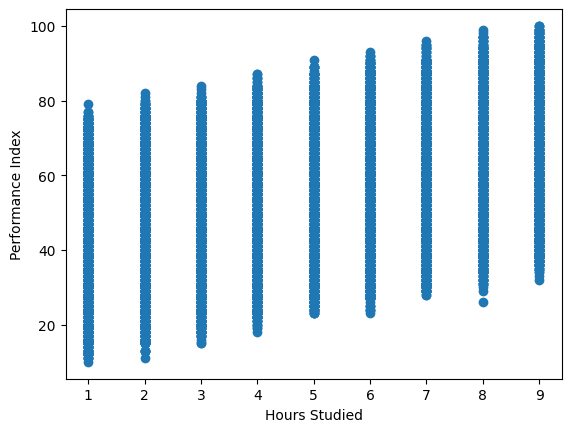

In [ ]:
plt.scatter(df1['Hours Studied'], df1['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')

In [ ]:
#Correlation
df1.corr()

,Hours Studied,Performance Index
Hours Studied,1.00000,0.37373
Performance Index,0.37373,1.00000


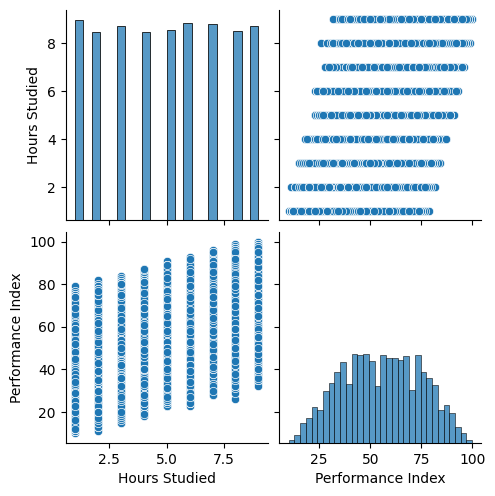

In [ ]:
import seaborn as sns
sns.pairplot(df1)

Text(0, 0.5, 'Performance Index')

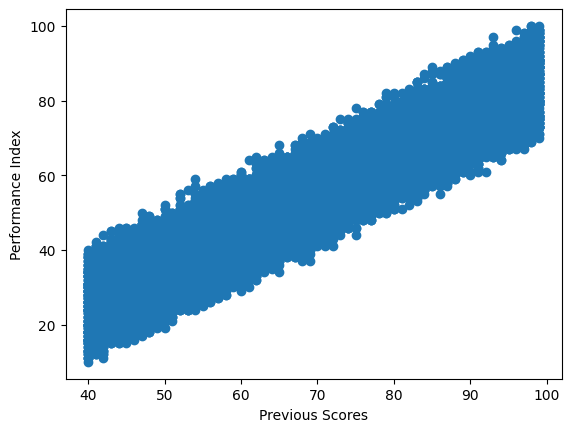

In [ ]:
df2 = df[['Previous Scores', 'Performance Index']]
plt.scatter(df2['Previous Scores'], df1['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

In [ ]:
df2.corr()

,Previous Scores,Performance Index
Previous Scores,1.000000,0.915189
Performance Index,0.915189,1.000000


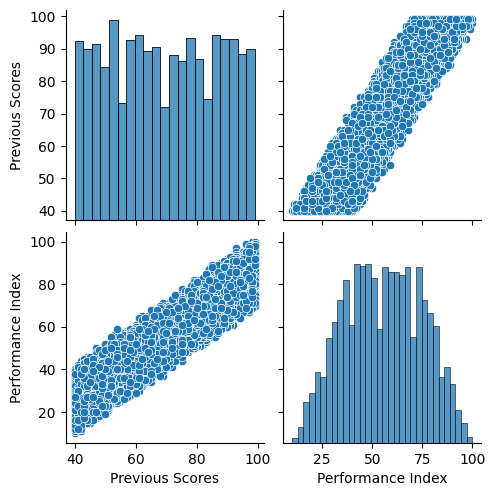

In [ ]:
import seaborn as sns
sns.pairplot(df2)

In [ ]:
X = df2[['Previous Scores']]
y = df2[['Performance Index']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
## Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print(regression.coef_, regression.intercept_)

[[17.57197012]] [55.4184]


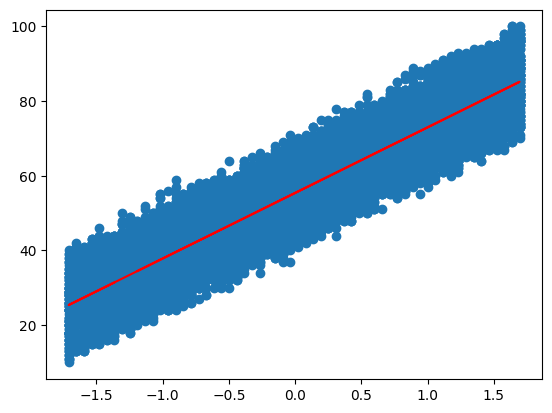

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train), color='red')

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
## Perfomance Metrices

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse,"\n",mae,"\n",rmse)

58.670594387484655 
 6.528589451840961 
 7.659673255921865


In [ ]:
# R squared

from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_pred)
score

0.8407592881001957

In [ ]:
## Predict using ols
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[ -0.64938514 -23.96237942 -13.82629495 ...  11.51391622   2.3914402
  -7.74464427]


Result from gradient descent
coeff, intercept = [[17.57197012]] [55.4184]

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.090
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              739.4
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                   2.29e-155
Time:                        11:32:43   Log-Likelihood:                         -40827.
No. Observations:                7500   AIC:                                  8.166e+04
Df Residuals:                    7499   BIC:                                  8.166e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## Predicting new data

new_val = scaler.transform([[95]])
regression.predict(new_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[81.12283447]])

#2. Multiple Linear Regression

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df_multi = df

In [ ]:
df_multi.drop(columns=['Extracurricular Activities'], axis=1, inplace=True)

In [ ]:
df_multi.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [ ]:
df_multi.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

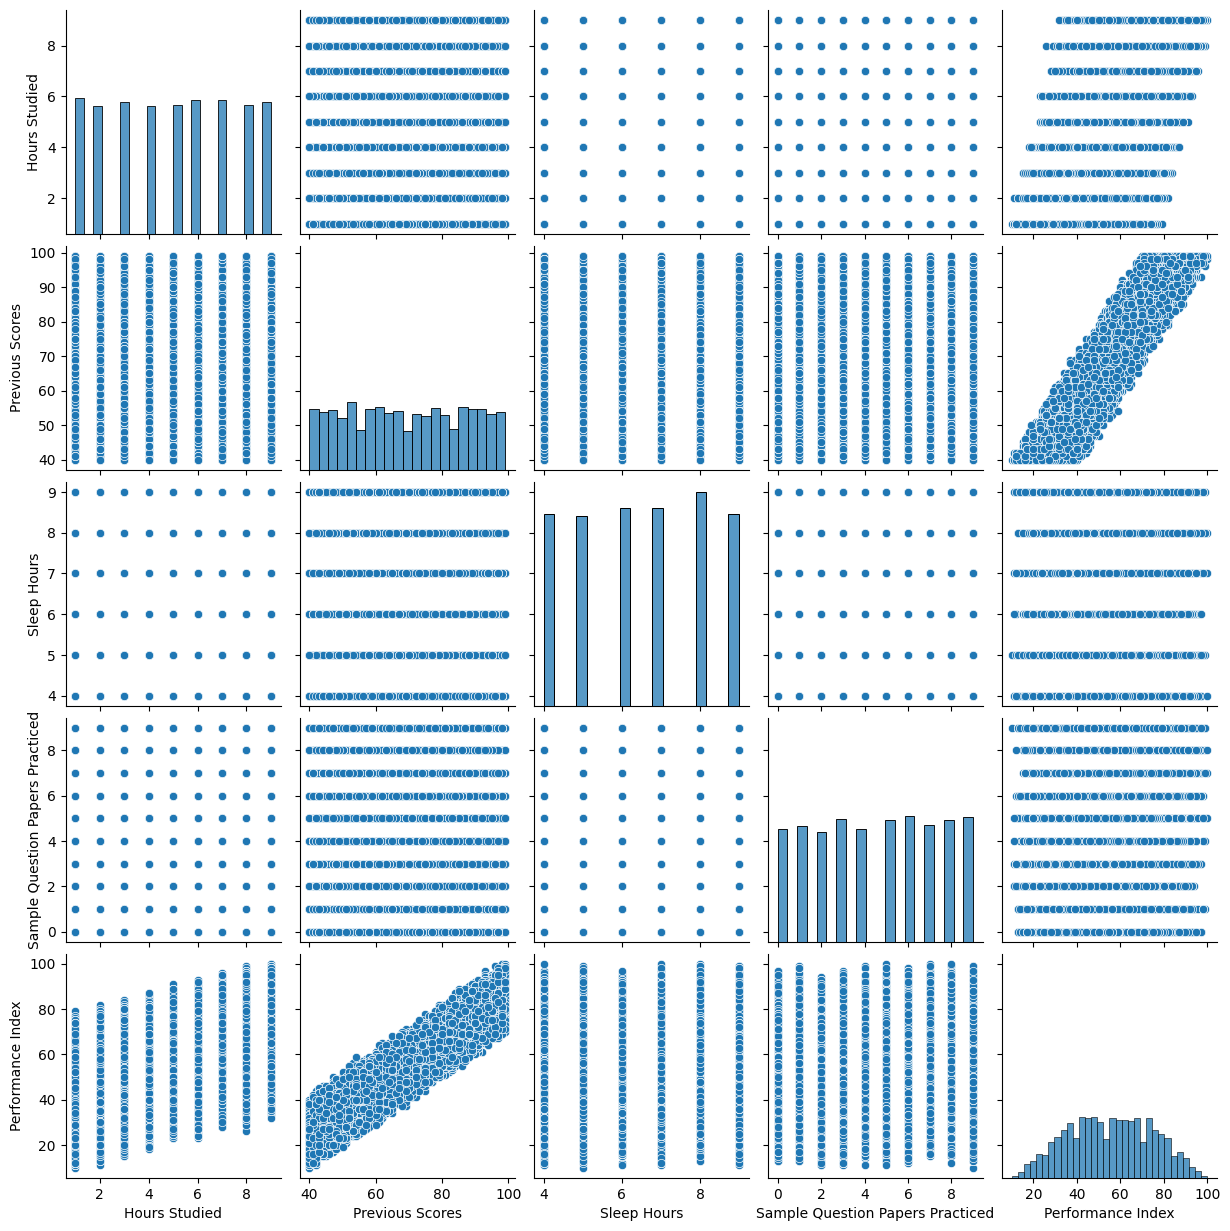

In [ ]:
sns.pairplot(df_multi)

In [ ]:
df_multi.drop(columns=['Sleep Hours', 'Sample Question Papers Practiced'], axis=1, inplace=True)

In [ ]:
df_multi.head()

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


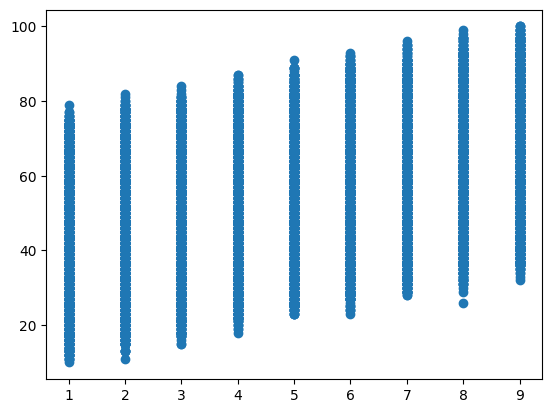

In [ ]:
plt.scatter(df_multi['Hours Studied'], df_multi['Performance Index'])

In [ ]:
X = df_multi.iloc[:,:-1]
y = df_multi.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

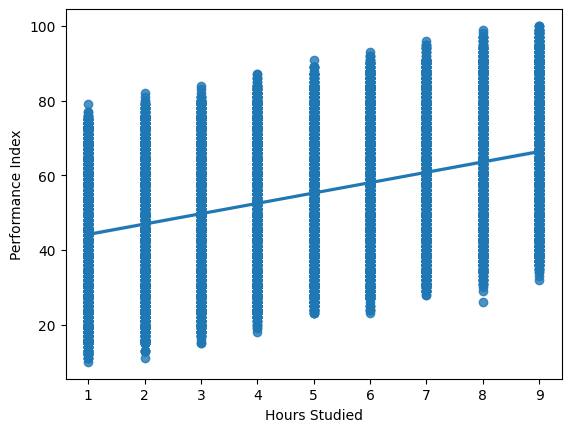

In [ ]:
sns.regplot(x=df_multi['Hours Studied'], y=df_multi['Performance Index'])

In [ ]:
## Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5)

In [ ]:
validation_score

array([-5.62434403, -4.99428821, -5.22095555, -5.26052358, -5.01275463])

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
## Perfomance Metrices

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse,"\n",mae,"\n",rmse)

5.205508992996873 
 1.811104817736341 
 2.281558457063258


In [ ]:
# R squared

from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_pred)
score

0.9858714750293637

In [ ]:
residuals = y_test-y_pred

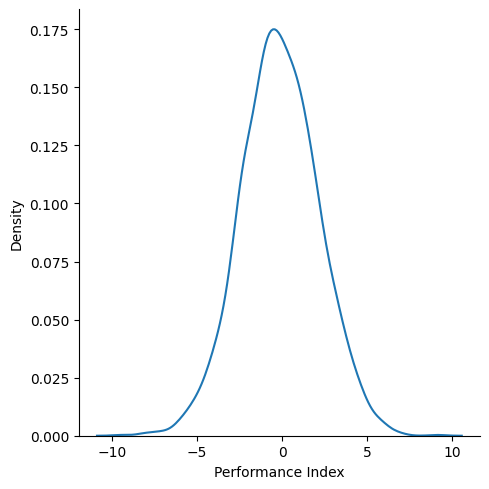

In [ ]:
sns.displot(residuals, kind = 'kde')

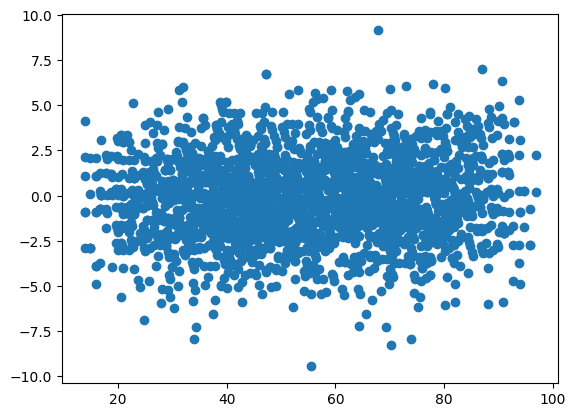

In [ ]:
plt.scatter(y_pred, residuals)

In [ ]:
## Predict using ols
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, X_train).fit()

In [ ]:
prediction = model.predict(X_test)
print(prediction)

[ -0.59233758 -32.56500006  -8.08860207 ...  11.6101262   -0.40325727
   0.87416545]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.106
Method:                 Least Squares   F-statistic:                              443.5
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                   9.12e-183
Time:                        13:11:07   Log-Likelihood:                         -40760.
No. Observations:                7500   AIC:                                  8.152e+04
Df Residuals:                    7498   BIC:                                  8.154e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#3. Non Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Create dataset with non linear trend
X = 6*np.random.rand(100,1) - 3
y = 0.5 *X**2 + 1.5*X +2 + np.random.randn(100,1)

Text(0, 0.5, 'y datapoints')

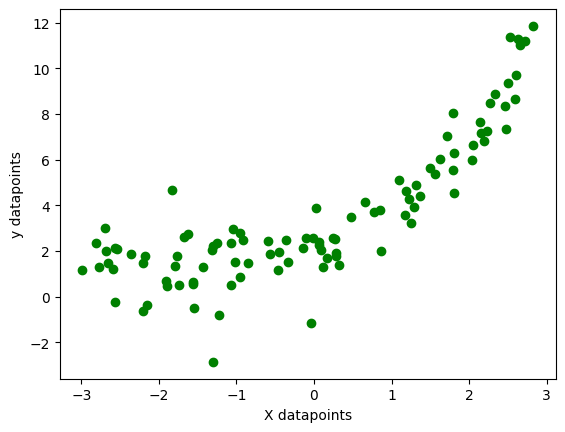

In [6]:
plt.scatter(X,y, color = 'g')
plt.xlabel("X datapoints")
plt.ylabel("y datapoints")

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [9]:
regression.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,regression.predict(X_test))
print(r2score)

0.604994729362893


Text(0, 0.5, 'y train actual and pred')

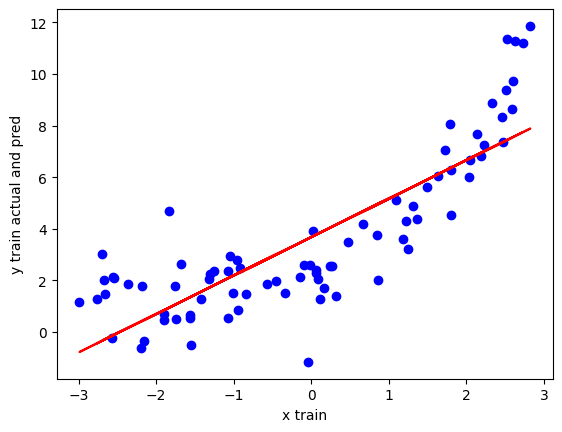

In [11]:
# Prediction using linear regression
plt.plot(X_train, regression.predict(X_train), color='r')
plt.scatter(X_train, y_train, color='b')
plt.xlabel("x train")
plt.ylabel("y train actual and pred")

In [12]:
# Prediction usinf polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8438783188944683


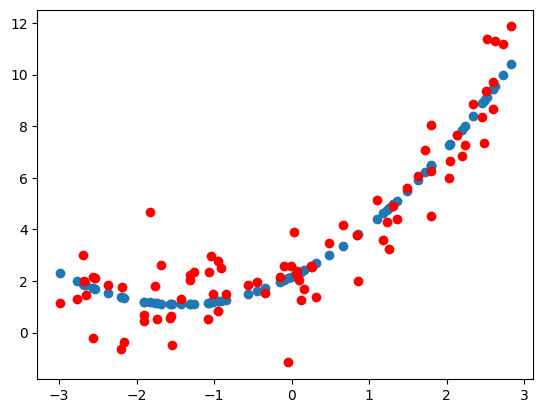

In [17]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train, color = 'r')

In [18]:
print(regression.coef_)

[[0.         1.47735479 0.51048167]]
